# IS 4487 Assignment 11: Predicting Airbnb Prices with Regression

In this assignment, you will:
- Load the Airbnb dataset you cleaned and transformed in Assignment 7
- Build a linear regression model to predict listing price
- Interpret which features most affect price
- Try to improve your model using only the most impactful predictors
- Practice explaining your findings to a business audience like a host, pricing strategist, or city partner

## Why This Matters

Pricing is one of the most important levers for hosts and Airbnb’s business teams. Understanding what drives price — and being able to predict it accurately — helps improve search results, revenue management, and guest satisfaction.

This assignment gives you hands-on practice turning a cleaned dataset into a predictive model. You’ll focus not just on code, but on what the results mean and how you’d communicate them to stakeholders.

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Assignments/assignment_11_regression.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Original Source: Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


## 1. Load Your Transformed Airbnb Dataset

**Business framing:**  
Before building any models, we must start with clean, prepared data. In Assignment 7, you exported a cleaned version of your Airbnb dataset. You’ll now import that file for analysis.

### Do the following:
- Import your CSV file called `cleaned_airbnb_data_7.csv`.   (Note: If you had significant errors with assignment 7, you can use the file named "airbnb_listings.csv" in the DataSets folder on GitHub as a backup starting point.)
- Use `pandas` to load and preview the dataset

### In Your Response:
1. What does the dataset include?
2. How many rows and columns are present?


In [13]:
import pandas as pd
# Add code here 🔧
url = 'https://raw.githubusercontent.com/vandanara/UofUtah_IS4487/main/DataSets/airbnb_listings.csv'
df = pd.read_csv(url)
df.info()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,host_url,host_name,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2992450,https://www.airbnb.com/rooms/2992450,20250804133828,2025-08-04,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://www.airbnb.com/users/show/4621559,Kenneth,...,4.56,3.22,3.67,NaN,0,1,1,0,0,0.07
1,3820211,https://www.airbnb.com/rooms/3820211,20250804133828,2025-08-04,city scrape,Funky Urban Gem: Prime Central Location - Park...,Step into the charming and comfy 1BR/1BA apart...,Overview<br /><br />The lovely apartment is lo...,https://www.airbnb.com/users/show/19648678,Terra,...,4.81,4.81,4.77,NaN,0,4,4,0,0,2.32
2,5651579,https://www.airbnb.com/rooms/5651579,20250804133828,2025-08-04,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://www.airbnb.com/users/show/29288920,Gregg,...,4.88,4.76,4.64,NaN,0,2,1,1,0,2.97
3,6623339,https://www.airbnb.com/rooms/6623339,20250804133828,2025-08-04,city scrape,Bright & Cozy City Stay · Top Location + Parking!,Step into the charming and comfy 1BR/1BA apart...,Overview<br /><br />The lovely apartment is lo...,https://www.airbnb.com/users/show/19648678,Terra,...,4.70,4.80,4.72,NaN,0,4,4,0,0,2.68
4,9005989,https://www.airbnb.com/rooms/9005989,20250804133828,2025-08-04,city scrape,"Studio in The heart of Center SQ, in Albany NY",(21 years of age or older ONLY) NON- SMOKING.....,"There are many shops, restaurants, bars, museu...",https://www.airbnb.com/users/show/17766924,Sugey,...,4.93,4.87,4.77,NaN,0,1,1,0,0,5.67


In [30]:
df.head(100)

,listing_url,scrape_id,last_scraped,source,neighborhood_overview,host_url,host_name,host_since,host_location,host_about,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/2992450,20250804133828,2025-08-04,city scrape,NaN,https://www.airbnb.com/users/show/4621559,Kenneth,2013-01-07,"New York, NY",I am a real down to earth & cool person.,...,4.56,3.22,3.67,NaN,0,1,1,0,0,0.07
1,https://www.airbnb.com/rooms/3820211,20250804133828,2025-08-04,city scrape,Overview<br /><br />The lovely apartment is lo...,https://www.airbnb.com/users/show/19648678,Terra,2014-08-07,"Albany, NY","Hello! I’m a proud resident of Albany, NY, whe...",...,4.81,4.81,4.77,NaN,0,4,4,0,0,2.32
2,https://www.airbnb.com/rooms/5651579,20250804133828,2025-08-04,city scrape,The neighborhood is very eclectic. We have a v...,https://www.airbnb.com/users/show/29288920,Gregg,2015-03-13,"Albany, NY",I am an Albany native .I have lived in Ireland...,...,4.88,4.76,4.64,NaN,0,2,1,1,0,2.97
3,https://www.airbnb.com/rooms/6623339,20250804133828,2025-08-04,city scrape,Overview<br /><br />The lovely apartment is lo...,https://www.airbnb.com/users/show/19648678,Terra,2014-08-07,"Albany, NY","Hello! I’m a proud resident of Albany, NY, whe...",...,4.70,4.80,4.72,NaN,0,4,4,0,0,2.68
4,https://www.airbnb.com/rooms/9005989,20250804133828,2025-08-04,city scrape,"There are many shops, restaurants, bars, museu...",https://www.airbnb.com/users/show/17766924,Sugey,2014-07-07,"Albany, NY",NaN,...,4.93,4.87,4.77,NaN,0,1,1,0,0,5.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,https://www.airbnb.com/rooms/51461480,20250804133828,2025-08-04,city scrape,We are located in a beautifully renovated hist...,https://www.airbnb.com/users/show/416799784,Rosie,2021-08-04,"Albany, NY",Our team works hard to ensure guests feel welc...,...,5.00,4.93,4.83,NaN,0,1,1,0,0,0.65
96,https://www.airbnb.com/rooms/51503537,20250804133828,2025-08-04,city scrape,You are at the heart of Downtown Albany! Block...,https://www.airbnb.com/users/show/394420519,Christopher,2021-03-27,"Glenville, NY",NaN,...,3.80,4.40,3.60,NaN,0,1,1,0,0,0.21
97,https://www.airbnb.com/rooms/51579900,20250804133828,2025-08-04,city scrape,PRIME location in the heart of downtown Albany...,https://www.airbnb.com/users/show/47625981,Linda,2015-10-28,"Albany, NY",NaN,...,4.83,4.59,4.74,NaN,0,19,19,0,0,1.69
98,https://www.airbnb.com/rooms/51592836,20250804133828,2025-08-04,city scrape,Walking distance to Capitol Repertory Theater ...,https://www.airbnb.com/users/show/60293220,David,2016-02-24,"Latham, NY",NaN,...,4.92,4.49,4.80,NaN,0,3,3,0,0,1.98


In [16]:
print(df.shape)

(459, 77)


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            459 non-null    int64  
 1   listing_url                                   459 non-null    object 
 2   scrape_id                                     459 non-null    int64  
 3   last_scraped                                  459 non-null    object 
 4   source                                        459 non-null    object 
 5   name                                          459 non-null    object 
 6   description                                   449 non-null    object 
 7   neighborhood_overview                         196 non-null    object 
 8   host_url                                      459 non-null    object 
 9   host_name                                     459 non-null    obj

### ✍️ Your Response: 🔧
1. The dataset shows Airbnb listings and the info on what is contained in the Airbnb and stats to see the usage of these Airbnb properties.

2. There are 459 rows and 77 columns of data

## 2. Drop Columns Not Useful for Modeling

**Business framing:**  
Some columns — like post IDs or text — may not help us predict price and could add noise or bias.

### Do the following:
- Drop columns like `post_id`, `title`, `descr`, `details`, and `address` if they’re still in your dataset

### In Your Response:
1. What columns did you drop, and why?
2. What risks might occur if you included them in your model?


In [18]:
#add code
df = df.drop(columns=['id', 'name', 'description'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   459 non-null    object 
 1   scrape_id                                     459 non-null    int64  
 2   last_scraped                                  459 non-null    object 
 3   source                                        459 non-null    object 
 4   neighborhood_overview                         196 non-null    object 
 5   host_url                                      459 non-null    object 
 6   host_name                                     459 non-null    object 
 7   host_since                                    459 non-null    object 
 8   host_location                                 345 non-null    object 
 9   host_about                                    251 non-null    obj

### ✍️ Your Response: 🔧
1. I dropped ID, name, and description

2. Leaving these included could confuse the models on evaluating relations in later parts of analysis.

## 3. Explore Relationships Between Numeric Features

**Business framing:**  
Understanding how features relate to each other — and to the target — helps guide feature selection and modeling.

### Do the following:
- Generate a correlation matrix
- Identify which variables are strongly related to `price`

### In Your Response:
1. Which variables had the strongest positive or negative correlation with price?
2. Which variables might be useful predictors?


Correlation with 'price':
 price                                           1.000000
accommodates                                    0.579588
beds                                            0.547032
bedrooms                                        0.499286
bathrooms                                       0.468030
estimated_revenue_l365d                         0.249488
maximum_maximum_nights                          0.122872
minimum_maximum_nights                          0.112166
maximum_nights_avg_ntm                          0.111271
availability_30                                 0.108409
availability_60                                 0.060509
availability_90                                 0.040997
calculated_host_listings_count_entire_homes     0.033206
availability_eoy                                0.032537
review_scores_value                             0.018269
maximum_nights                                  0.017992
calculated_host_listings_count                  0.015773
revi

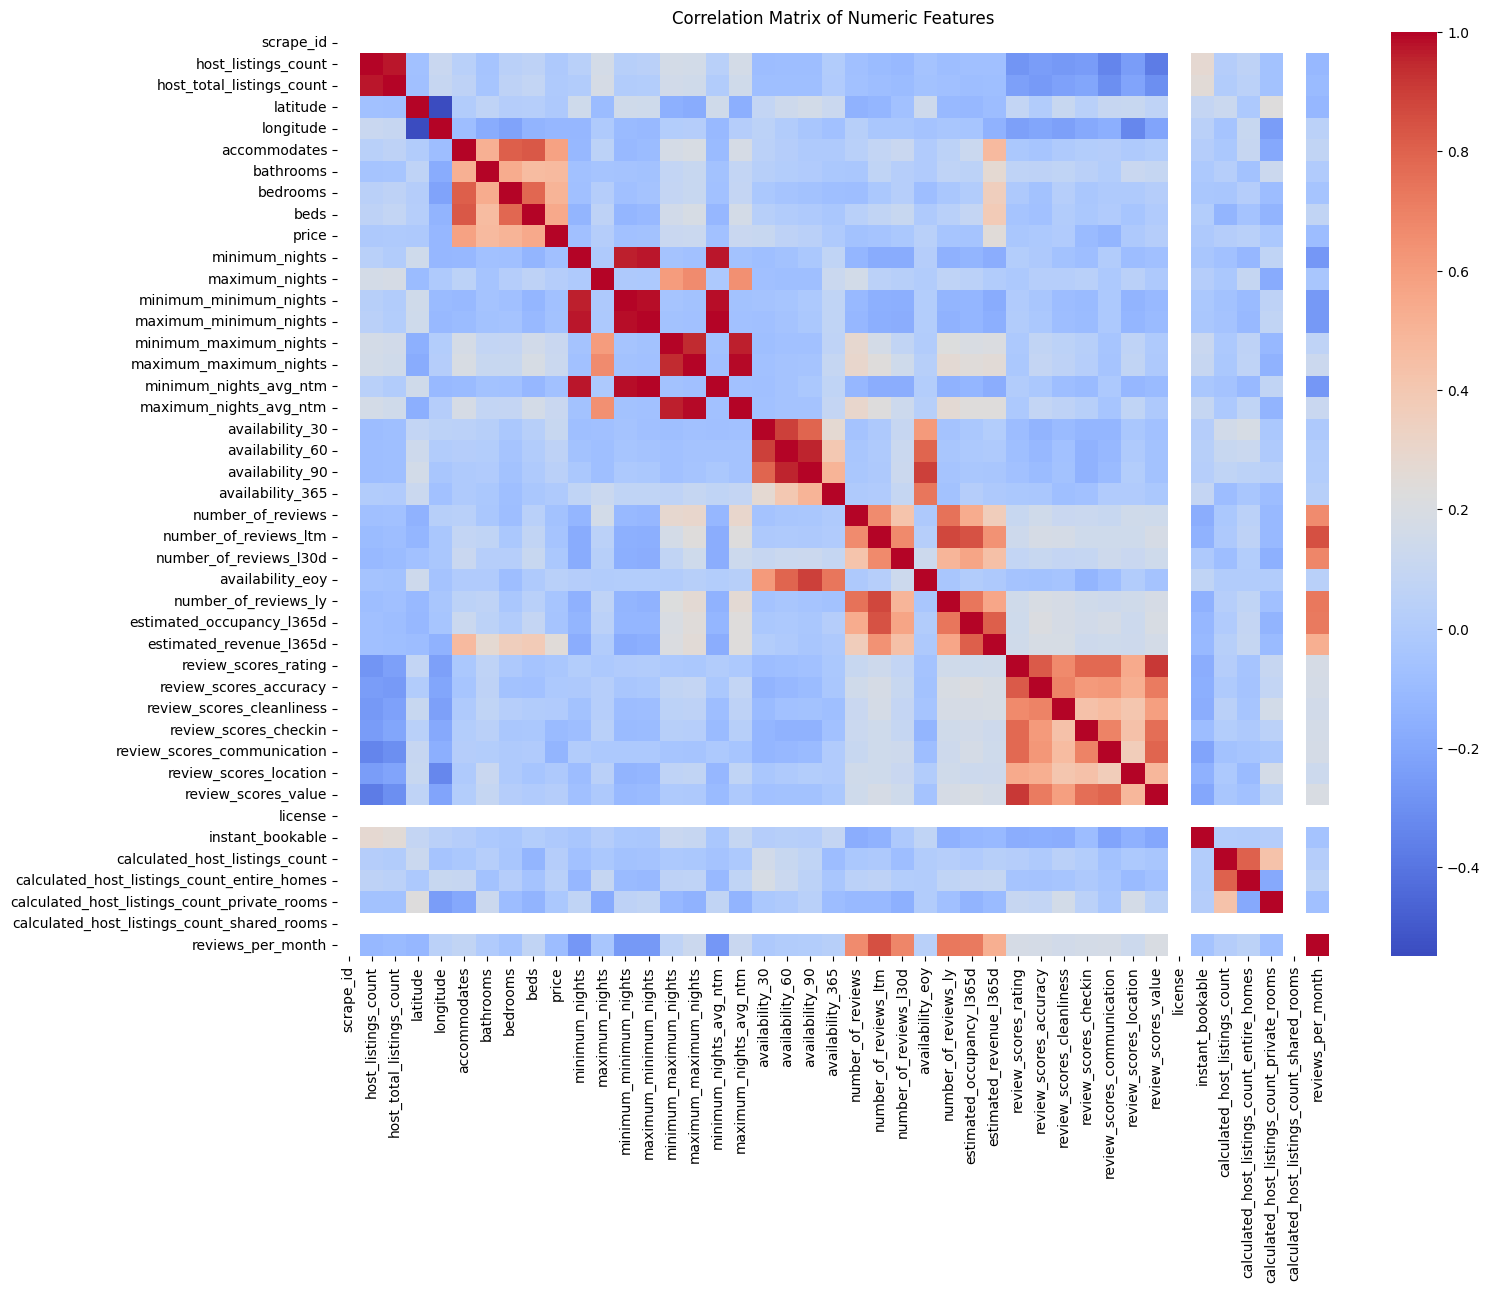

In [20]:
# Generate the correlation matrix for all numeric columns
correlation_matrix = df.corr(numeric_only=True)

# Display correlations with the 'price' column, sorted by absolute value
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print("Correlation with 'price':\n", price_correlations)

# Visualize the full correlation matrix using a heatmap
plt.figure(figsize=(16, 12)) # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### ✍️ Your Response: 🔧
1. The accommodates, beds, bedrooms, and bathrooms variables had the strongest correlation compared to all other variables.

2. Those variables above are going to be useful predictors to identify pricing, but maybe taking in estimated revenue over the year could be a slightly helpful variable at predicting price.

## 4. Define Features and Target Variable

**Business framing:**  
To build a regression model, you need to define what you’re predicting (target) and what you’re using to make that prediction (features).

### Do the following:
- Set `price` as your target variable
- Remove `price` from your predictors

### In Your Response:
1. What features are you using?
2. Why is this a regression problem and not a classification problem?


In [36]:
# Define the target variable
y = df['price']

# Select all numeric columns for features, excluding 'price'
X = df.select_dtypes(include=['number']).drop(columns=['price'], errors='ignore')

# Drop columns that are entirely NaN before imputation
X = X.dropna(axis=1, how='all')

# Impute remaining missing values in numeric features with the mean
for col in X.columns:
    if X[col].isnull().any():
        X[col] = X[col].fillna(X[col].mean())

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")
print("Features used:", X.columns.tolist())

Shape of X (features): (459, 41)
Shape of y (target): (459,)
Features used: ['scrape_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculate

### ✍️ Your Response: 🔧
1. I am using all the features available.

2. This is a regression problem because we are trying to predict continuous values of what the pricing of an Airbnb should be, and not classifying different sections/types of Airbnb pricing.

## 5. Split Data into Training and Testing Sets

### Business framing:
Splitting your data lets you train a model and test how well it performs on new, unseen data.

### Do the following:
- Use `train_test_split()` to split into 80% training, 20% testing



In [37]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (367, 41)
X_test shape: (92, 41)
y_train shape: (367,)
y_test shape: (92,)


## 6. Fit a Linear Regression Model

### Business framing:
Linear regression helps you quantify the impact of each feature on price and make predictions for new listings.

### Do the following:
- Fit a linear regression model to your training data
- Use it to predict prices for the test set



In [38]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


## 7. Evaluate Model Performance

### Business framing:  
A good model should make accurate predictions. We’ll use Mean Squared Error (MSE) and R² to evaluate how close our predictions were to the actual prices.

### Do the following:
- Print MSE and R² score for your model

### In Your Response:
1. What is your R² score? How well does your model explain price variation?
2. Is your MSE large or small? What could you do to improve it?


In [39]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 8240.03
R-squared (R²): -0.47


In [31]:
average_price = y.mean()
print(f"The average price of listings in the dataset is: ${average_price:.2f}")

The average price of listings in the dataset is: $116.10


### ✍️ Your Response: 🔧
1. My r2 score is -.47 which means it does not explain price variation at all.

2. As well as my MSE being abnormally large, meaning I need to change the features that are in the dataset to help myself get a more accurate model.

## 8. Interpret Model Coefficients

### Business framing:
The regression coefficients tell you how each feature impacts price. This can help Airbnb guide hosts and partners.

### Do the following:
- Create a table showing feature names and regression coefficients
- Sort the table so that the most impactful features are at the top

### In Your Response:
1. Which features increased price the most?
2. Were any surprisingly negative?
3. What business insight could you draw from this?


In [41]:
# Create a DataFrame to display feature names and their coefficients
coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

# Sort by the absolute value of the coefficient to see the most impactful features
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

print("Regression Coefficients (sorted by absolute impact):")
print(coefficients_df[['Feature', 'Coefficient']])

Regression Coefficients (sorted by absolute impact):
                                         Feature   Coefficient
3                                       latitude -8.308867e+02
4                                      longitude -4.063903e+02
34                           review_scores_value  1.403872e+02
32                   review_scores_communication -1.359397e+02
31                         review_scores_checkin -9.124014e+01
6                                      bathrooms  3.413941e+01
15                        minimum_nights_avg_ntm  3.375357e+01
12                        maximum_minimum_nights -3.318238e+01
30                     review_scores_cleanliness -2.921170e+01
29                        review_scores_accuracy  2.776448e+01
7                                       bedrooms -2.093295e+01
8                                           beds  1.835542e+01
33                        review_scores_location -1.639754e+01
5                                   accommodates  1.616862e+01
40

### ✍️ Your Response: 🔧
1. The latitude and longitude and review scores all were the most important features.

2. The bedrooms feature was a surprising negative feature. I thought the number of bedrooms would be a good direct indicator of price, but I guess the number of beds itself is more important.

3. The amount of bathrooms is a very important indicator for how much pricing an Airbnb should be, as well as incorportating the accommodates and the amount of beds inside the property is crucial.


## 9. Try to Improve the Linear Regression Model

### Business framing:
The first version of your model included all available features — but not all features are equally useful. Removing weak or noisy predictors can often improve performance and interpretation.

### Do the following:
1. Choose your top 3–5 features with the strongest absolute coefficients
2. Rebuild the regression model using just those features
3. Compare MSE and R² between the baseline and refined model

### In Your Response:
1. What features did you keep in the refined model, and why?
2. Did model performance improve? Why or why not?
3. Which model would you recommend to stakeholders?
4. How does this relate to your customized learning outcome you created in canvas?


In [43]:
# 1. Define the target variable y_refined as the 'price' column from the DataFrame df.
y_refined = df['price']

# 2. Create a new DataFrame X_refined containing only the specified features
selected_features = ['latitude', 'longitude', 'review_scores_value', 'review_scores_communication', 'review_scores_checkin']
X_refined = df[selected_features].copy()

# 3. Impute any missing values in X_refined with the mean of their respective columns.
for col in X_refined.columns:
    if X_refined[col].isnull().any():
        X_refined[col] = X_refined[col].fillna(X_refined[col].mean())

# 4. Split X_refined and y_refined into training and testing sets
X_refined_train, X_refined_test, y_refined_train, y_refined_test = train_test_split(X_refined, y_refined, test_size=0.2, random_state=42)

print(f"X_refined_train shape: {X_refined_train.shape}")
print(f"X_refined_test shape: {X_refined_test.shape}")
print(f"y_refined_train shape: {y_refined_train.shape}")
print(f"y_refined_test shape: {y_refined_test.shape}")
print("Features used in refined model:", X_refined.columns.tolist())

# 5. Initialize a new LinearRegression model.
refined_model = LinearRegression()

# 6. Fit the new linear regression model to the refined training data
refined_model.fit(X_refined_train, y_refined_train)

# 7. Make predictions on the refined test set
y_refined_pred = refined_model.predict(X_refined_test)

# 8. Calculate the Mean Squared Error (MSE)
mse_refined = mean_squared_error(y_refined_test, y_refined_pred)

# 9. Calculate the R-squared (R²) score
r2_refined = r2_score(y_refined_test, y_refined_pred)

print(f"\nRefined Model Mean Squared Error (MSE): {mse_refined:.2f}")
print(f"Refined Model R-squared (R²): {r2_refined:.2f}")

# 10. Create a DataFrame to display feature names and their coefficients
coefficients_refined_df = pd.DataFrame({
    'Feature': X_refined_train.columns,
    'Coefficient': refined_model.coef_
})

# Sort by the absolute value of the coefficient
coefficients_refined_df['Abs_Coefficient'] = coefficients_refined_df['Coefficient'].abs()
coefficients_refined_df = coefficients_refined_df.sort_values(by='Abs_Coefficient', ascending=False)

print("\nRefined Model Regression Coefficients (sorted by absolute impact):")
print(coefficients_refined_df[['Feature', 'Coefficient']])

X_refined_train shape: (367, 5)
X_refined_test shape: (92, 5)
y_refined_train shape: (367,)
y_refined_test shape: (92,)
Features used in refined model: ['latitude', 'longitude', 'review_scores_value', 'review_scores_communication', 'review_scores_checkin']

Refined Model Mean Squared Error (MSE): 6314.59
Refined Model R-squared (R²): -0.13

Refined Model Regression Coefficients (sorted by absolute impact):
                       Feature  Coefficient
0                     latitude -1080.182254
1                    longitude  -884.452079
2          review_scores_value   133.407202
3  review_scores_communication  -124.054833
4        review_scores_checkin  -107.475398


### ✍️ Your Response: 🔧
1. I kept the latitude, longitude, review score value, review score communication, and review score checkin features because they were the most impactful in the first model.

2. The model did not improve at all, besides the MSE score going down, but overall the rebuilding did not improve anything.

3. I would not recommend any of these models to stakeholders and try to redo the models. I do not understand how the first model made up such a model and I have tried to change it but my data is going farther and farther from accuracy.

4. This relates to my customized learning outcome the same way every assignment has, increasing my skills and understanding of data analysis. To further my skills for analyzing environmental impacts on ski resorts.


## 10. Reflect and Recommend

### Business framing:  
Ultimately, the value of your model comes from how well it can guide business decisions. Use your results to make real-world recommendations.

### In Your Response:
1. What business question did your model help answer?
2. What would you recommend to Airbnb or its hosts?
3. What could you do next to improve this model or make it more useful?
4. How does this relate to your customized learning outcome you created in canvas?


### ✍️ Your Response: 🔧
1. It is supposed to help answer which variables are important to evaluate when determining price of an AirBnB

2. I would recommend to AirBnb hosts to increase the amount of bathrooms and beds that are available in the property to increase the pricing value.

3. Making different features to fully capture the dataset's usefulness and identify real world helpful models.

4. It relates by giving me experience on what I should be doing on how to evaluate models and how to change them to get my desired outcome.

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [11]:
!jupyter nbconvert --to html "assignment_11_LastnameFirstname.ipynb"

[NbConvertApp] WARNING | pattern 'assignment_11_LastnameFirstname.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes